## Step 1: Import necessary libraries & dataset
We start by importing a few Python packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
%matplotlib inline

Load our dataset

In [2]:
train = pd.read_csv('/kaggle/input/gdgoc-telu-ml-challenge/train.csv')
test = pd.read_csv('/kaggle/input/gdgoc-telu-ml-challenge/test.csv')

train.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,Spain,Male,38.0,2,62276.99,1,Yes,Yes,59280.79,No,4,DIAMOND,757,0
1,2,Chinweuba,529.0,France,Female,29.0,8,0.00,2,Yes,NaN,19842.11,No,3,SILVER,476,0
2,3,Clapp,589.0,France,Female,50.0,4,0.00,2,No,Yes,182076.97,No,4,PLATINUM,441,0
3,4,Boni,515.0,France,Male,40.0,0,109542.29,1,Yes,Yes,166370.81,No,5,GOLD,312,0
4,5,Jamieson,528.0,Spain,Male,43.0,7,97473.87,2,Yes,Yes,159823.16,No,3,PLATINUM,654,0


In [3]:
test.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,2001,Ugonna,693,Germany,Male,44,5,124601.58,2,Yes,Yes,46998.13,Yes,2,SILVER,408
1,2002,Nebeolisa,607,Germany,Male,29,7,102609.00,1,Yes,No,163257.44,No,5,DIAMOND,800
2,2003,Tsai,689,Spain,Male,73,1,108555.07,1,No,Yes,167969.15,No,1,PLATINUM,623
3,2004,Downie,660,France,Female,38,5,110570.78,2,Yes,No,195906.59,No,1,SILVER,472
4,2005,Morehead,503,France,Male,38,1,0.00,2,Yes,Yes,95153.24,No,2,DIAMOND,433


In [4]:
print(f'Train columns: {train.columns}')
print(f'Test columns: {test.columns}')

Train columns: Index(['ID', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned', 'Exited'],
      dtype='object')
Test columns: Index(['ID', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


As you can see, in the test data there is no `Exited` column, because that's what we want to predict

## Step 2: Exploratory Data Analysis (EDA)
It is recommended that you explore and visualize the data to find analysis or insight into the characteristics of customers who leave the bank.

But here I only do simple EDA for demo purposes only

In [5]:
numerical_cols = [var for var in train.columns if train[var].dtype != 'object'] # get the numerical columns
categorical_cols = [var for var in train.columns if train[var].dtype == 'object'] # get the categorical columns

print('Numerical columns:')
print(numerical_cols)

Numerical columns:
['ID', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned', 'Exited']


In [6]:
print('Categorical columns:')
print(categorical_cols)

Categorical columns:
['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']


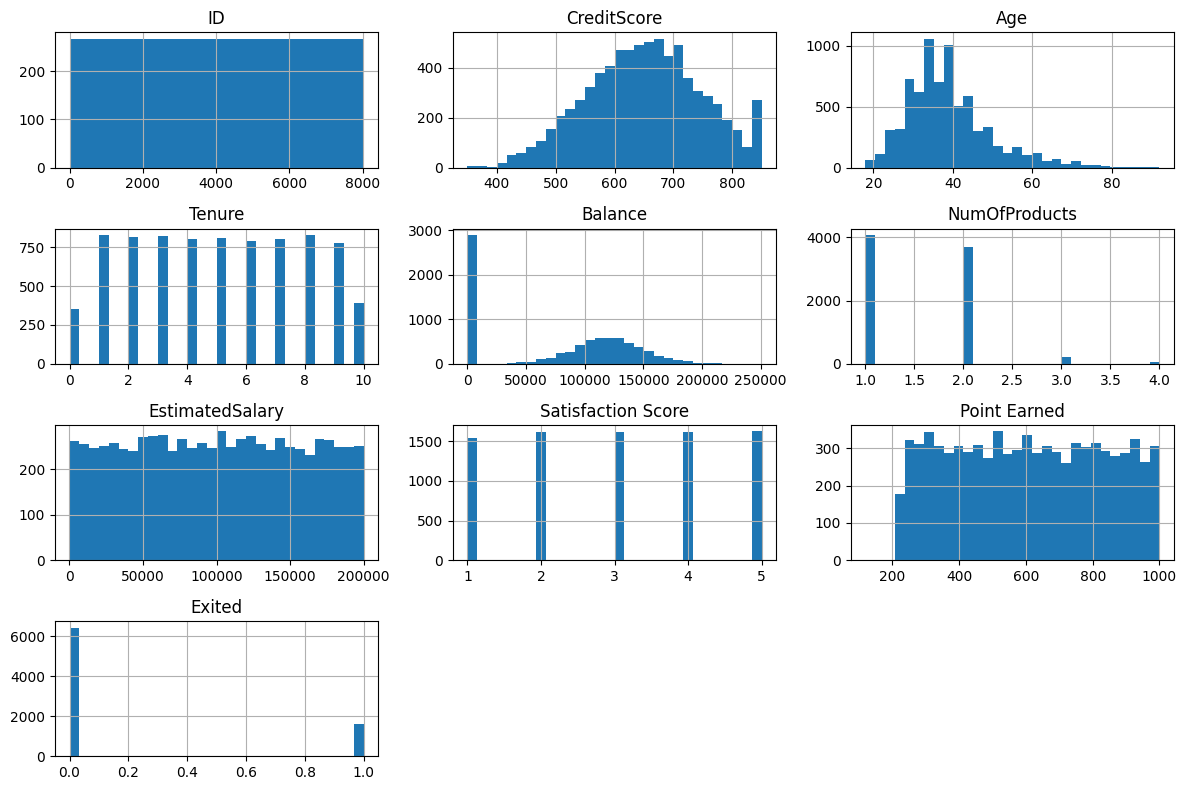

In [7]:
train[numerical_cols].hist(bins=30, figsize=(12,8));
plt.tight_layout()
plt.show()

In [8]:
categorical_cols

['Surname',
 'Geography',
 'Gender',
 'HasCrCard',
 'IsActiveMember',
 'Complain',
 'Card Type']

In [9]:
# Removing 'Surname' from categorical_cols
k = 'Surname'

while(k in categorical_cols):
    categorical_cols.remove(k)

categorical_cols

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']

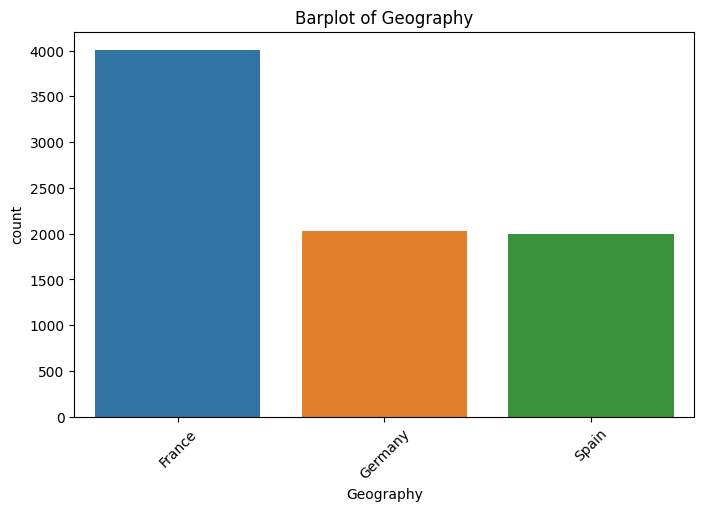

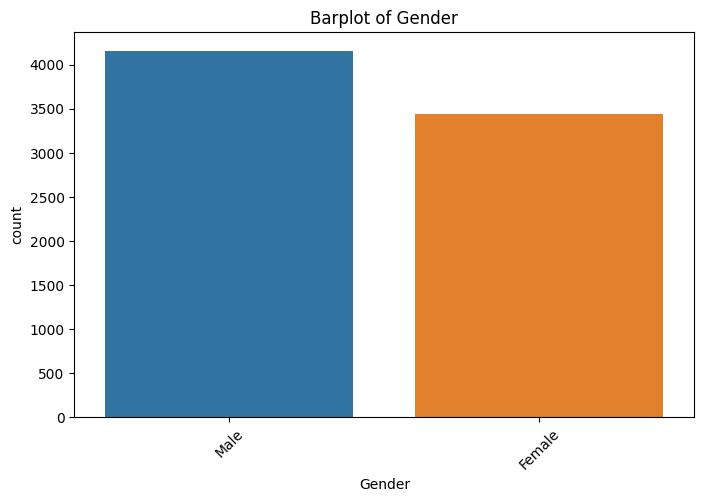

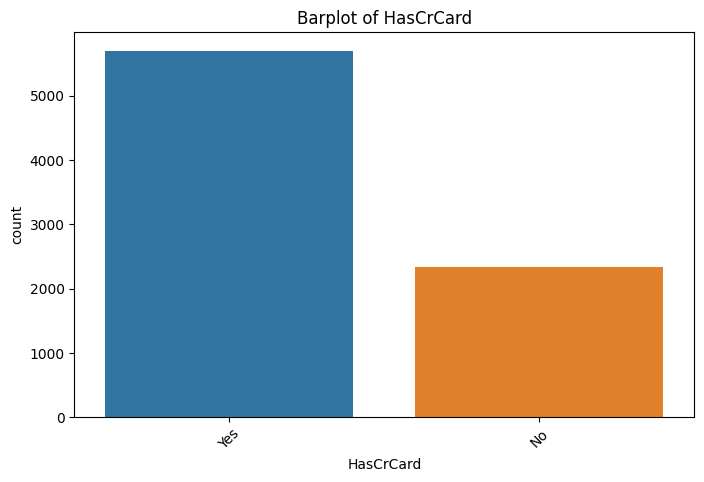

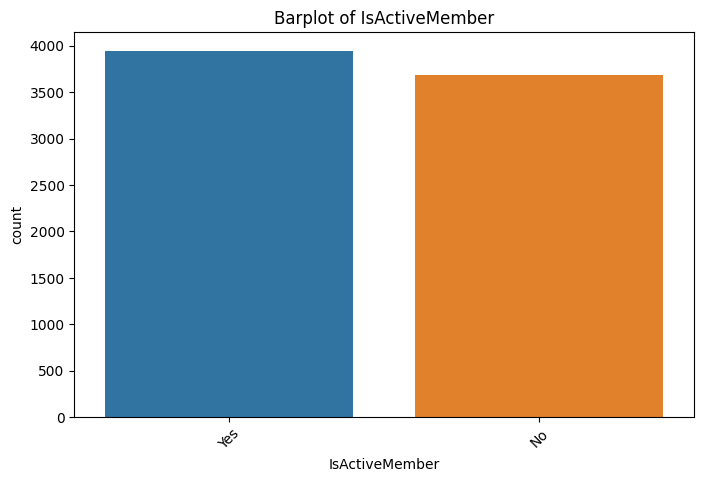

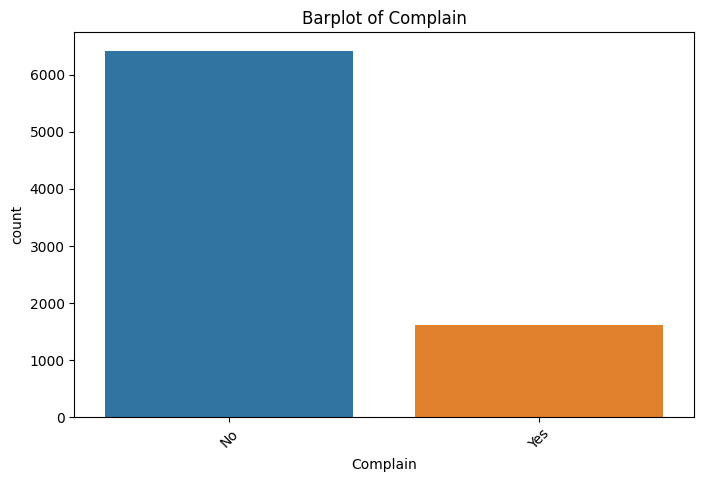

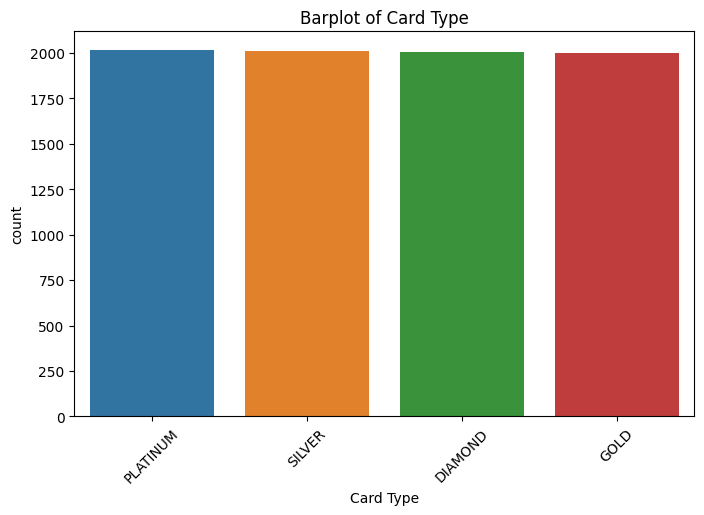

In [10]:
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.title(f'Barplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
train2 = train.copy() # copy the original dataframe

for col in categorical_cols:
    le = LabelEncoder()
    
    train2[col] = le.fit_transform(train2[col])

train2.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,2,1,38.0,2,62276.99,1,1,1,59280.79,0,4,0,757,0
1,2,Chinweuba,529.0,0,0,29.0,8,0.00,2,1,2,19842.11,0,3,3,476,0
2,3,Clapp,589.0,0,0,50.0,4,0.00,2,0,1,182076.97,0,4,2,441,0
3,4,Boni,515.0,0,1,40.0,0,109542.29,1,1,1,166370.81,0,5,1,312,0
4,5,Jamieson,528.0,2,1,43.0,7,97473.87,2,1,1,159823.16,0,3,2,654,0


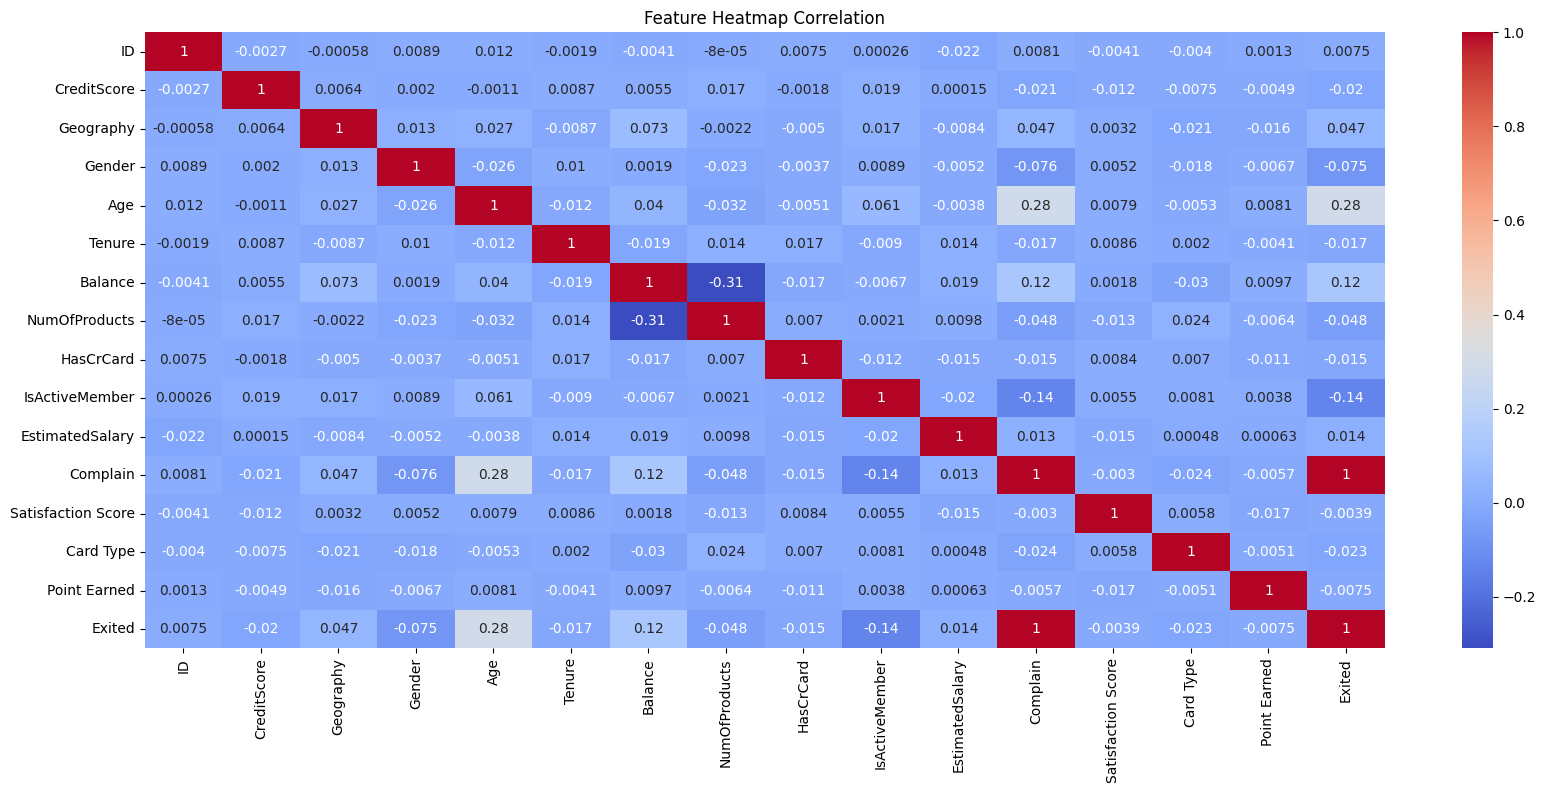

In [12]:
num_corr = train2.drop('Surname', axis=1).corr()

plt.figure(figsize=(20,8))
sns.heatmap(num_corr, annot=True, cmap='coolwarm')
plt.title('Feature Heatmap Correlation')
plt.show()

It is recommended to add more data visualization to get new insights.

## Step 3: Feature Engineering & Data Preprocessing
At this stage, I will be handling missing values & categorical encoding only for demo purposes. But you are advised to do the other methods according to what you have learned so far

Filling missing values

In [13]:
train.isna().sum().sort_values(ascending=False)

Age                   442
CreditScore           427
Gender                423
IsActiveMember        402
EstimatedSalary       366
ID                      0
Point Earned            0
Card Type               0
Satisfaction Score      0
Complain                0
NumOfProducts           0
HasCrCard               0
Surname                 0
Balance                 0
Tenure                  0
Geography               0
Exited                  0
dtype: int64

In [14]:
test.isna().sum().sort_values(ascending=False)

ID                    0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

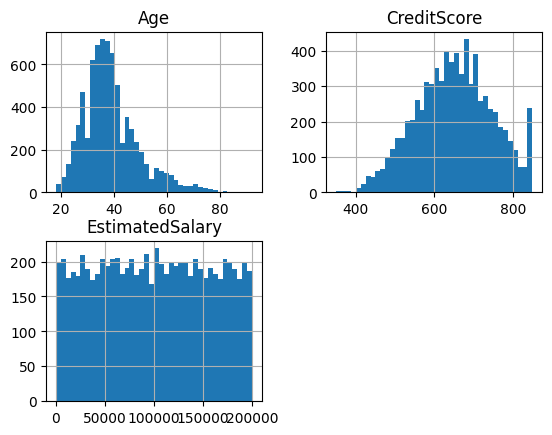

In [15]:
train[['Age', 'CreditScore', 'EstimatedSalary']].hist(bins=40);

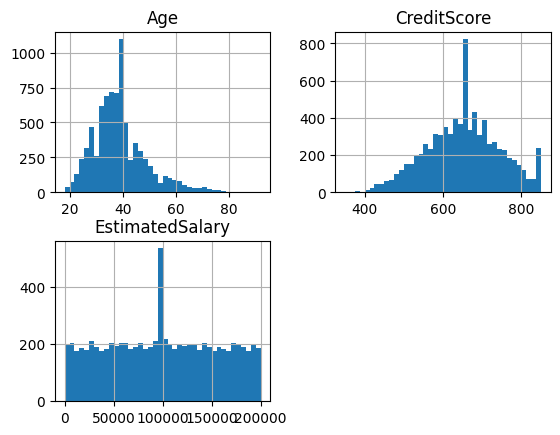

In [16]:
# Filling missing values
for col in ['Age', 'CreditScore', 'EstimatedSalary']:
    train[col].fillna(train[col].mean(), inplace=True)

train[['Age', 'CreditScore', 'EstimatedSalary']].hist(bins=40);

In [17]:
train.isna().sum().sort_values(ascending=False)

Gender                423
IsActiveMember        402
ID                      0
HasCrCard               0
Point Earned            0
Card Type               0
Satisfaction Score      0
Complain                0
EstimatedSalary         0
NumOfProducts           0
Surname                 0
Balance                 0
Tenure                  0
Age                     0
Geography               0
CreditScore             0
Exited                  0
dtype: int64

Check for duplicated rows

In [18]:
train.duplicated().sum()

0

Categorical Encoding

In [19]:
for col in categorical_cols:
    print(train[col].value_counts())
    print('-'*50)

Geography
France     4006
Germany    2027
Spain      1997
Name: count, dtype: int64
--------------------------------------------------
Gender
Male      4162
Female    3445
Name: count, dtype: int64
--------------------------------------------------
HasCrCard
Yes    5700
No     2330
Name: count, dtype: int64
--------------------------------------------------
IsActiveMember
Yes    3948
No     3680
Name: count, dtype: int64
--------------------------------------------------
Complain
No     6422
Yes    1608
Name: count, dtype: int64
--------------------------------------------------
Card Type
PLATINUM    2017
SILVER      2010
DIAMOND     2003
GOLD        2000
Name: count, dtype: int64
--------------------------------------------------


In [20]:
le = LabelEncoder()

for col in categorical_cols:
    le = LabelEncoder()
    
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col]) # dont forget to apply it to the test column too!

train.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,2,1,38.0,2,62276.99,1,1,1,59280.79,0,4,0,757,0
1,2,Chinweuba,529.0,0,0,29.0,8,0.00,2,1,2,19842.11,0,3,3,476,0
2,3,Clapp,589.0,0,0,50.0,4,0.00,2,0,1,182076.97,0,4,2,441,0
3,4,Boni,515.0,0,1,40.0,0,109542.29,1,1,1,166370.81,0,5,1,312,0
4,5,Jamieson,528.0,2,1,43.0,7,97473.87,2,1,1,159823.16,0,3,2,654,0


In [21]:
test.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,2001,Ugonna,693,1,1,44,5,124601.58,2,1,1,46998.13,1,2,3,408
1,2002,Nebeolisa,607,1,1,29,7,102609.00,1,1,0,163257.44,0,5,0,800
2,2003,Tsai,689,2,1,73,1,108555.07,1,0,1,167969.15,0,1,2,623
3,2004,Downie,660,0,0,38,5,110570.78,2,1,0,195906.59,0,1,3,472
4,2005,Morehead,503,0,1,38,1,0.00,2,1,1,95153.24,0,2,0,433


## Step 4: Machine Learning Modelling

In [22]:
train.drop(['ID', 'Surname'], axis=1, inplace=True)

X = train.drop('Exited',axis=1) # features
y = train['Exited'] # target

X_train, X_val, y_train, y_val = train_test_split(
    X, # features
    y, # target
    test_size = 0.2, # test size for validation data 20%, 80% for train data
    random_state=42 # so that the result is fixed, because splitting data is actually random. you must use random_state!
)


X_train.shape, y_train.shape, X_val.shape, y_val.shape

((6424, 14), (6424,), (1606, 14), (1606,))

For this demo I will use the Support Vector Machine model, but you are encouraged to try using other machine learning models for classification tasks, such as DecisionTreeClassifier, RandomForest, LogisticRegression, KNN-Classifier, and others.

This is a resource that describes some machine learning models you can use: https://medium.com/@bashiralam185/top-20-classification-algorithms-in-machine-learning-e40d9dda2461

But not only that, there are many more machine learning models that you can use

In [23]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=7) # initialize our ML model

model_knn.fit(X_train, y_train) # training our model

KNeighborsClassifier(n_neighbors=7)

In [24]:
y_val

6074    0
5958    1
3032    0
6446    0
318     0
       ..
4609    0
2943    0
2441    0
921     1
322     0
Name: Exited, Length: 1606, dtype: int64

In [25]:
y_pred_val = model_knn.predict(X_val) # predict on validation data

pd.Series(y_pred_val).value_counts()

0    1555
1      51
Name: count, dtype: int64

In [26]:
print(f'F1-score: {f1_score(y_val, y_pred_val)}')

F1-score: 0.08356545961002786


The F1-score results are close to 0, which indicates that the model performs very poorly. Therefore, it is recommended to try other models to improve prediction accuracy. A good model should produce an F1-score close to or reaching 1 when tested on validation data.

But since this is a demo, we will predict the test data using this model

## Step 5: Predict on Test Data

In [27]:
test.drop(['ID', 'Surname'], axis=1, inplace=True)

test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,693,1,1,44,5,124601.58,2,1,1,46998.13,1,2,3,408
1,607,1,1,29,7,102609.00,1,1,0,163257.44,0,5,0,800
2,689,2,1,73,1,108555.07,1,0,1,167969.15,0,1,2,623
3,660,0,0,38,5,110570.78,2,1,0,195906.59,0,1,3,472
4,503,0,1,38,1,0.00,2,1,1,95153.24,0,2,0,433


In [28]:
test['Exited'] = model_knn.predict(test) # predict and add 'Exited' column on test data

test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,693,1,1,44,5,124601.58,2,1,1,46998.13,1,2,3,408,0
1,607,1,1,29,7,102609.00,1,1,0,163257.44,0,5,0,800,0
2,689,2,1,73,1,108555.07,1,0,1,167969.15,0,1,2,623,0
3,660,0,0,38,5,110570.78,2,1,0,195906.59,0,1,3,472,0
4,503,0,1,38,1,0.00,2,1,1,95153.24,0,2,0,433,0


In [29]:
test['Exited'].value_counts()

Exited
0    1934
1      66
Name: count, dtype: int64

## Step 6: Submission
When submitting, make sure your data has two columns: `ID` and `Exited`, as Kaggle only accepts this format. You can see an example of the submission format in the file `sample_submission.csv`

In [30]:
submission = pd.read_csv('/kaggle/input/gdgoc-telu-ml-challenge/sample_submission.csv')

submission

,ID,Exited
0,2001,1
1,2002,0
2,2003,0
3,2004,1
4,2005,0
...,...,...
1995,3996,1
1996,3997,0
1997,3998,1
1998,3999,0


In [31]:
# replace the 'Exited' column in the submission file with the prediction result column in our test data
submission['Exited'] = test['Exited']

submission

,ID,Exited
0,2001,0
1,2002,0
2,2003,0
3,2004,0
4,2005,0
...,...,...
1995,3996,0
1996,3997,0
1997,3998,0
1998,3999,0


In [32]:
submission.to_csv('my_first_submission.csv', index=False) # save the submission file to CSV 

And voilà! You're now ready to submit your predictions on the challenge page. Simply navigate to the **Submissions** tab, click the **Submit Predictions** button, and upload your submission file.

If your submission is successful, your name will appear on the leaderboard, showcasing your placement and score. Best of luck! 🎉🚀